In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
import h5py
import pptx 

import os 
import re

from pptx import Presentation
from pptx.util import Inches
from utils import *

sns.set_theme(context="talk")
pal = sns.color_palette()

In [ ]:
df_rois = pd.read_csv('list_rois_name.csv')
df_rois = df_rois.loc[ df_rois['name'] != 'Inferior fronto-occipital fasciculus']
df_rois = df_rois.loc[ df_rois['name'] != 'Unclassified']


### display sex effect on HRF across ROIs

Text(415.5, 0.5, 'feature')

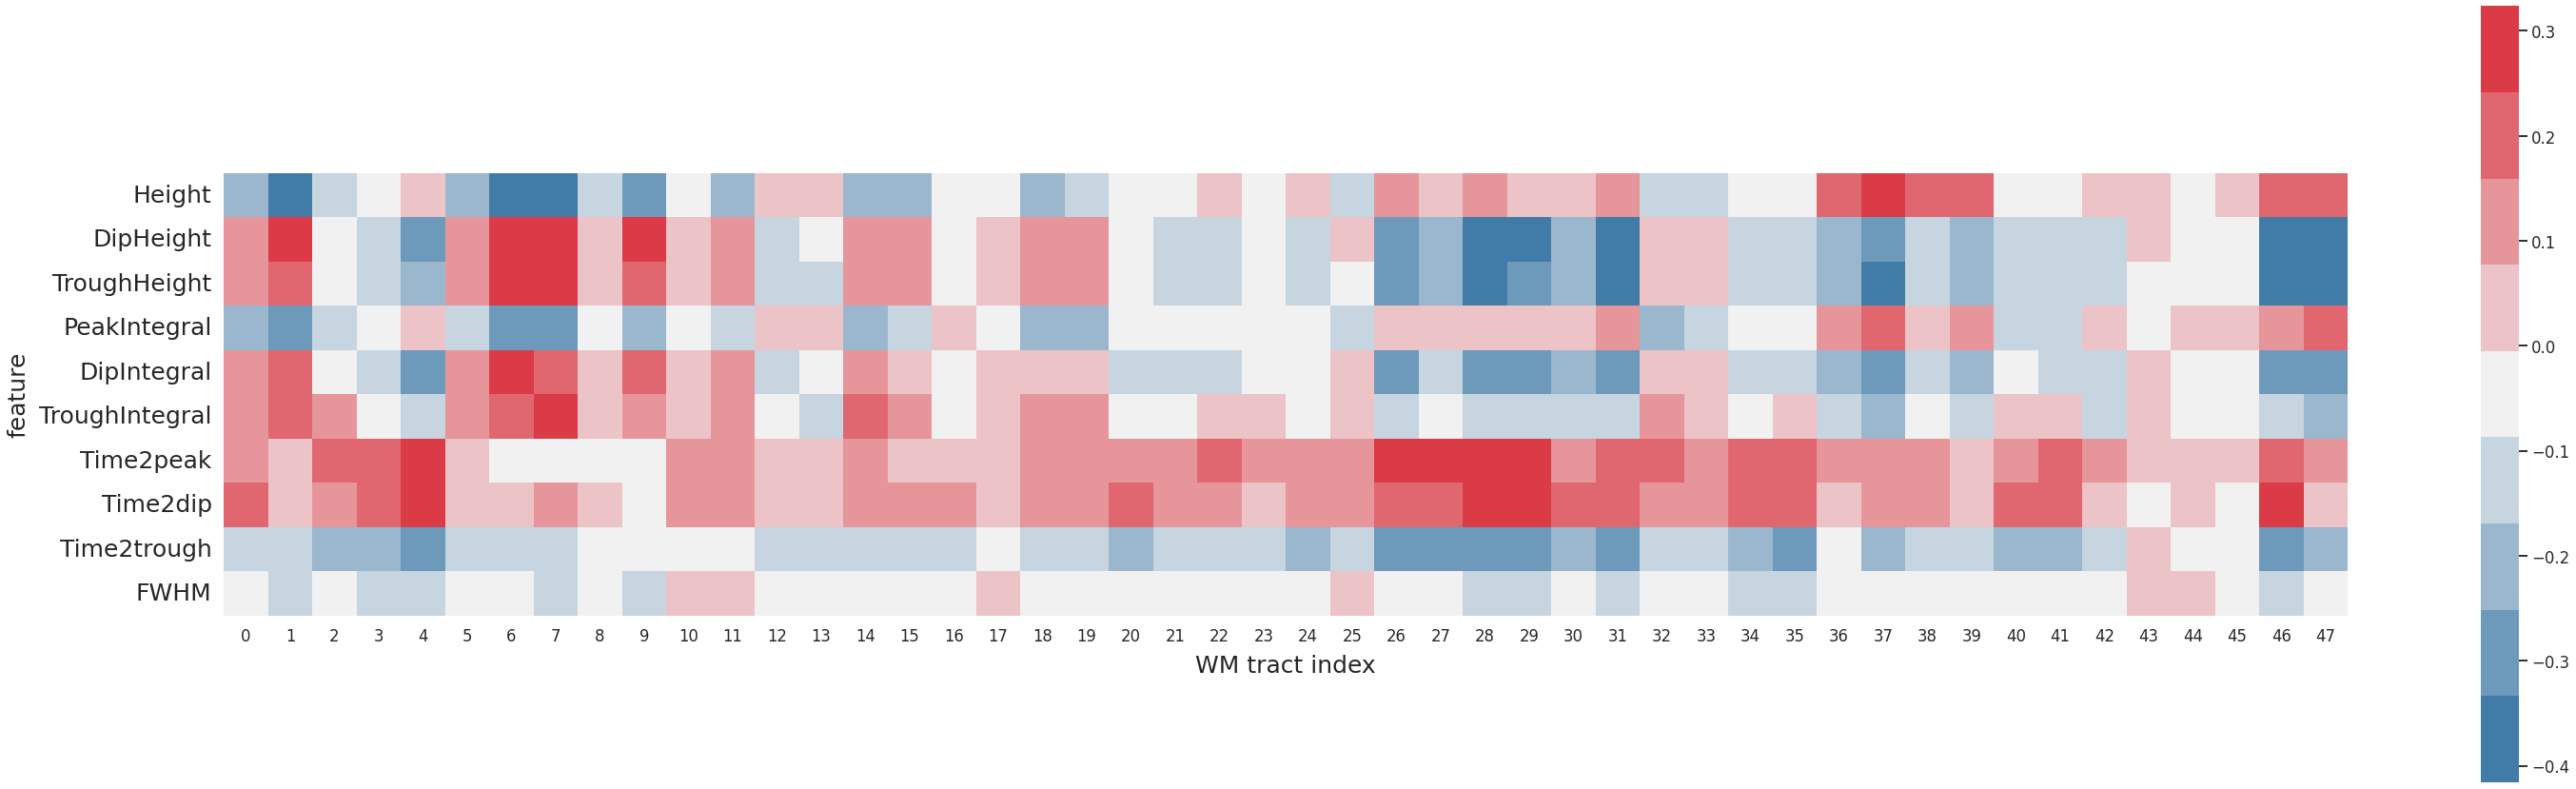

In [63]:
filedir = '/home/local/VANDERBILT/dolel/Documents/harmonized/'
font = 25

tissus = ['Mean_brain', 'Mean_brain_harmonized']
names = ['WM', 'WM after harmonization']

params = ['Height', 'DipHeight', 'TroughHeight', 'PeakIntegral', 'DipIntegral', 'TroughIntegral', 'Time2peak', 'Time2dip', 'Time2trough',  'FWHM']

nb_features = len(params) 
mat_d = np.zeros(shape=(nb_features,len(df_rois)))
mask = np.zeros(shape=(nb_features,len(df_rois)))

list_rois =['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30',
           '31','32','33','34','35','36','37','38','39','40','41','42','43','44','47','48','49','50']


fig = plt.figure(figsize=(50,15))
for i in range(nb_features):
  feature = params[i]
  file = filedir + feature + '.csv'
  df = pd.read_csv(file)

  for j in range(len(list_rois)):
    idx = list_rois[j]

    df_1 = df.loc[df['Sex']=='F']
    df_2 = df.loc[df['Sex']=='M']

    # p1 = stats.shapiro(df_1[j+'_harmonized'])
    # p2 = stats.shapiro(df_2[j+'_harmonized'])

    F, p = stats.kruskal(df_1[idx+'_harmonized'],  df_2[idx+'_harmonized'])
    d = cohens_d(df_1[idx+'_harmonized'],  df_2[idx+'_harmonized'])

    cmap = sns.color_palette("rocket", as_cmap=True)
    mat_d[i,j] = d
    mask[i,j] = p

cmap = sns.diverging_palette(240, 10, n=9)     

ax = sns.heatmap(mat_d, cmap = cmap, square=True)
# cmap =sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)

# ax = sns.heatmap(mask, cmap =cmap,cbar=False, annot=True, square=True)

plt.yticks(np.arange(10)+0.5, params, rotation=0, fontsize=font)
plt.xlabel("WM tract index",labelpad=10, fontsize=font)
plt.ylabel("feature", labelpad = 10, fontsize=font)


# fig.savefig('../../../rsHRF_project/output/plots/ComBAT_cohen-harmonized_sex_effect.png', bbox_inches="tight", dpi=600)

### display HRF with peak, dip, trough colored

In [ ]:
file = '/nfs2/rsHRF/ADNI/VUIISXNAT04_S16966/VUIISXNAT04_E232335/rsfmri/Deconv_Detrend_4DVolume_hrf.mat'
f = h5py.File(file, 'r') # shape of 53 is better for visualization
data_mat = f.get('hrfa')
data_mat = np.array(data_mat)

pal = sns.color_palette("Paired")

fig = plt.figure(figsize=(30,20))
t = 0.607 * np.arange(53)
axis = np.zeros((53,1))
ax = sns.lineplot(x=t, y=data_mat[1500,:], color='black') # a good HRF shape

# Get the two lines from the axes to generate shading
l1 = ax.lines[0]
# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

#### DIP color
xdip = x1[0:8]
ydip = y1[0:8]
xdip[7]=3.9
ydip[7]=0

ax.fill_between(xdip,ydip, color=pal[1], alpha=0.5)

#### PEAK color
xpeak = x1[7:24]
ypeak = y1[7:24]
xpeak[23-7]=13.7
ypeak[23-7] =0

ax.fill_between(xpeak,ypeak, color=pal[0], alpha=0.5)


#### PEAK color
xpeak = x1[23:-1]
ypeak = y1[23:-1]
xpeak[-1] =30
ypeak[-1] =0

ax.fill_between(xpeak,ypeak, color=pal[1], alpha=0.5)
plt.axis([0, t[-1], -0.4, 1.05])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('time (s)', fontdict={'fontsize':35})
plt.ylabel('signal amplitude', fontdict={'fontsize':35})
fig.savefig("hrf.png", dpi=600)

### create ppt presentation from image folder

In [ ]:



folder = 'all_images/'
l_images = []
for img in os.listdir(folder):
  name, ext = img.split('.')
  if ext == 'png':
    path_img = os.path.join(folder, img)
    l_images.append(path_img)


l_images = sorted(l_images)

template='test-template-2.pptx'
outfile=' test-brain.pptx'

prs = Presentation(template)
# Create the slides for images
for img in l_images:

    name = img.split('/')[-1]
    name = name.split('.')[0]
    name_splitted = name.split('_')

    title_slide_layout = prs.slide_layouts[9]
    new_slide = prs.slides.add_slide(title_slide_layout)
    title = new_slide.shapes.title

    rois = ' '.join(name_splitted[3:7])
    title.text = name_splitted[1] + ' ' + rois
    
    
    offset = 7.5 -6.8
    pic = new_slide.shapes.add_picture(img, pptx.util.Inches(0.0), pptx.util.Inches(offset),
                               width=pptx.util.Inches(13.33), height=pptx.util.Inches(6.8))
prs.save(outfile)